In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA CLEANING - TRAINING

In [2]:
flight_data = pd.read_csv("Data_Train.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
flight_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [7]:
flight_data.dropna(inplace=True)

In [8]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
flight_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
flight_data["journey_day"] = pd.to_datetime(flight_data.Date_of_Journey, format ="%d/%m/%Y").dt.day

In [11]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [12]:
flight_data["Jouney_month"] = pd.to_datetime(flight_data.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [13]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Jouney_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
flight_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [15]:
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Jouney_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
flight_data["Dep_Hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour

In [17]:
flight_data["Dep_Minute"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute

In [18]:
flight_data.drop(["Dep_Time"], axis= 1 , inplace=True)

In [19]:
flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
flight_data["Arrival_hour"] = pd.to_datetime(flight_data.Arrival_Time).dt.hour

In [21]:
flight_data["Arrival_minute"] = pd.to_datetime(flight_data.Arrival_Time).dt.minute

In [22]:
flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
flight_data.drop(["Arrival_Time"], axis = 1, inplace=True)

In [24]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
duration = list(flight_data["Duration"])
for i in range(len(duration)):
    if (len(duration[i].split())) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
            
            
           
        else:
            duration[i] = "0h " + duration[i]
            

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
     
            



In [26]:
flight_data["Duration_hours"] = duration_hours
flight_data["Duration_mins"] = duration_mins

In [27]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
flight_data.drop(["Duration"], axis = 1, inplace = True)

In [29]:
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
flight_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

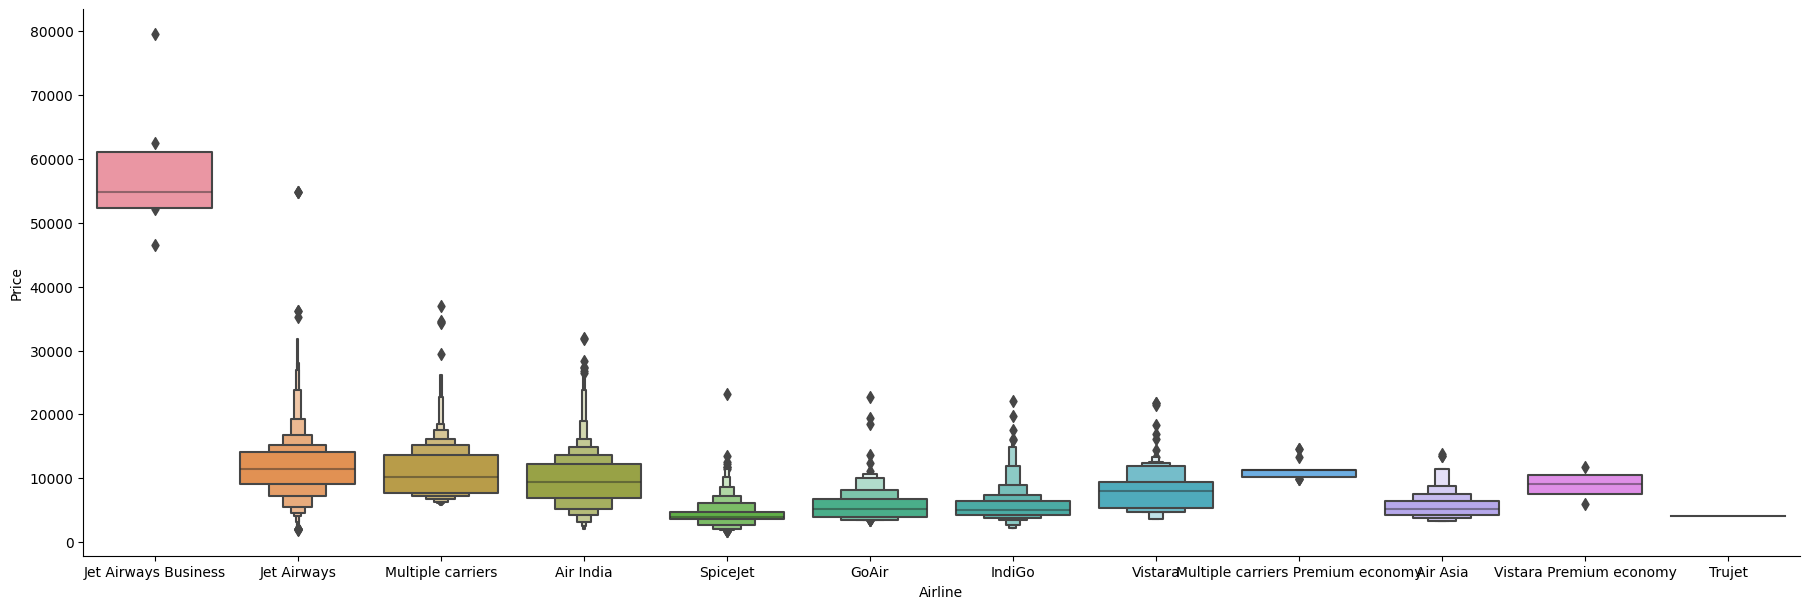

In [31]:
sns.catplot(y = "Price", x = "Airline", data = flight_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
Airline = flight_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
flight_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

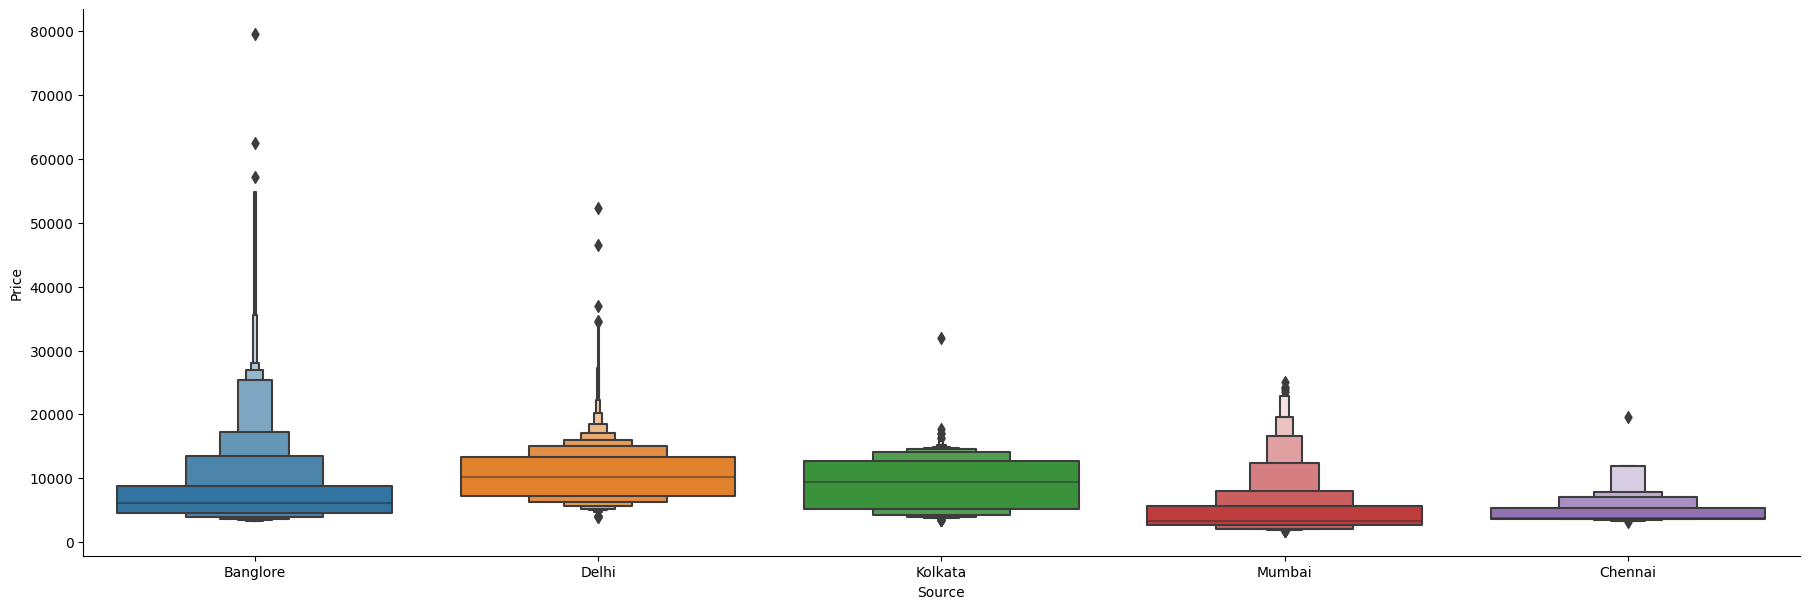

In [34]:
sns.catplot(y = "Price", x = "Source", data = flight_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect =3)
plt.show()

In [35]:
Source = flight_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
Destination = flight_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
flight_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [38]:
flight_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [39]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [40]:
flight_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
flight_data.replace({"non-stop":0, "1 stop" : 1, "2 stops": 2, "3 stops":3, "4 stops":4}, inplace=True)

In [42]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [43]:
flight_data_train = pd.concat([flight_data,Airline,Destination,Source], axis =1)

In [44]:
flight_data_train

,Airline,Source,Destination,Total_Stops,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [45]:
flight_data_train.drop(["Airline","Source","Destination"], axis=1, inplace=True)

In [46]:
flight_data_train.head()

,Total_Stops,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
flight_data_train.shape

(10682, 30)

# DATA CLEANING = TEST

In [48]:
flight_test = pd.read_csv("Test_set.csv")

In [49]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
flight_test.dropna(inplace = True)

In [51]:
flight_test.shape

(2671, 10)

In [52]:
Airline1 = flight_test[["Airline"]]
Airline1 = pd.get_dummies(Airline1, drop_first = True)
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [53]:
Source1 = flight_test[["Source"]]
Source1 = pd.get_dummies(Source1, drop_first = True)
Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [54]:
Destination1 = flight_test[["Destination"]]
Destination1 = pd.get_dummies(Destination1, drop_first = True)
Destination1.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [55]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [56]:
flight_test["doj_day"] = pd.to_datetime(flight_test.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [57]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24


In [58]:
flight_test["doj_month"] = pd.to_datetime(flight_test.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [59]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_day,doj_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [60]:
flight_test.drop("Date_of_Journey", axis=1, inplace=True)

In [61]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_day,doj_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [62]:
flight_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
flight_test.replace({"1 stop" : 1, "non-stop" : 0, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace = True)

In [64]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_day,doj_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,24,6


In [65]:
flight_test["arrival_hour"] = pd.to_datetime(flight_test.Arrival_Time).dt.hour

In [66]:
flight_test["arrival_minute"] = pd.to_datetime(flight_test.Arrival_Time).dt.minute

In [67]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj_day,doj_month,arrival_hour,arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,24,6,2,45


In [68]:
flight_test.drop("Arrival_Time", axis = 1, inplace = True)

In [69]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,doj_day,doj_month,arrival_hour,arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,0,No info,24,6,2,45


In [70]:
duration1 = list(flight_test["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        
        if "h" in duration1[i]:
            
            duration1[i] =  duration1[i].strip() + " 0m"
            
        else:
            duration1[i] = "0h " +  duration1[i]
            
duration1_hours = []
duration1_mins = []

for i in range(len(duration1)):
    duration1_hours.append(int(duration1[i].split(sep = "h")[0]))
    duration1_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))
   

    

In [71]:
flight_test["Duration_hours"] = duration1_hours
flight_test["Duration_mins"] = duration1_mins

In [72]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1,No info,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1,No info,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1,In-flight meal not included,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1,No info,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,0,No info,24,6,2,45,2,50


In [73]:
flight_test.drop("Duration", axis = 1, inplace=True)

In [74]:
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,1,No info,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,1,No info,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,1,In-flight meal not included,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,1,No info,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,0,No info,24,6,2,45,2,50


In [75]:
flight_test.drop(["Additional_Info", "Route"], axis=1, inplace=True)

In [76]:
flight_test.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,17:30,1,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,06:20,1,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,19:15,1,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,08:00,1,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,23:55,0,24,6,2,45,2,50


In [77]:
flight_test["Dep_time_Hour"] = pd.to_datetime(flight_test.Dep_Time).dt.hour
flight_test["Dep_time_mins"] = pd.to_datetime(flight_test.Dep_Time).dt.minute

In [78]:
flight_test.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins,Dep_time_Hour,Dep_time_mins
0,Jet Airways,Delhi,Cochin,17:30,1,6,6,4,25,10,55,17,30
1,IndiGo,Kolkata,Banglore,06:20,1,12,5,10,20,4,0,6,20
2,Jet Airways,Delhi,Cochin,19:15,1,21,5,19,0,23,45,19,15
3,Multiple carriers,Delhi,Cochin,08:00,1,21,5,21,0,13,0,8,0
4,Air Asia,Banglore,Delhi,23:55,0,24,6,2,45,2,50,23,55


In [79]:
flight_test.drop(["Dep_Time"], axis=1, inplace = True)

In [80]:
flight_test.head()

,Airline,Source,Destination,Total_Stops,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins,Dep_time_Hour,Dep_time_mins
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,10,55,17,30
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,4,0,6,20
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,23,45,19,15
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,13,0,8,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,2,50,23,55


In [81]:
test_data = pd.concat([flight_test,Airline1,Destination1,Source1], axis = 1)

In [82]:
test_data

,Airline,Source,Destination,Total_Stops,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins,Dep_time_Hour,Dep_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,10,55,17,30,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,4,0,6,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,23,45,19,15,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,13,0,8,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,2,50,23,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,25,23,55,20,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2667,IndiGo,Kolkata,Banglore,0,27,3,16,55,2,35,14,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2668,Jet Airways,Delhi,Cochin,1,6,3,4,25,6,35,21,50,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2669,Air India,Delhi,Cochin,1,6,3,19,15,15,15,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [83]:
flight_test.shape

(2671, 12)

In [84]:
test_data.shape

(2671, 31)

In [85]:
test_data.drop(["Airline", "Source", "Destination" ] , axis = 1, inplace = True)

In [86]:
test_data.head()

,Total_Stops,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins,Dep_time_Hour,Dep_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,6,6,4,25,10,55,17,30,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,12,5,10,20,4,0,6,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,0,23,45,19,15,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,21,5,21,0,13,0,8,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,24,6,2,45,2,50,23,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
test_data.shape

(2671, 28)

In [91]:
flight_data_train

,Total_Stops,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# Now We Do Feature Selection

In [92]:
flight_data_train.shape

(10682, 30)

In [93]:
flight_data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'Jouney_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [94]:
y = flight_data_train["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [95]:
flight_data_train

,Total_Stops,Price,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [96]:
X = flight_data_train.loc[:, ['Total_Stops', 'journey_day', 'Jouney_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']]

In [97]:
X.head()

,Total_Stops,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [98]:
X.shape

(10682, 28)

In [99]:
y.shape

(10682,)

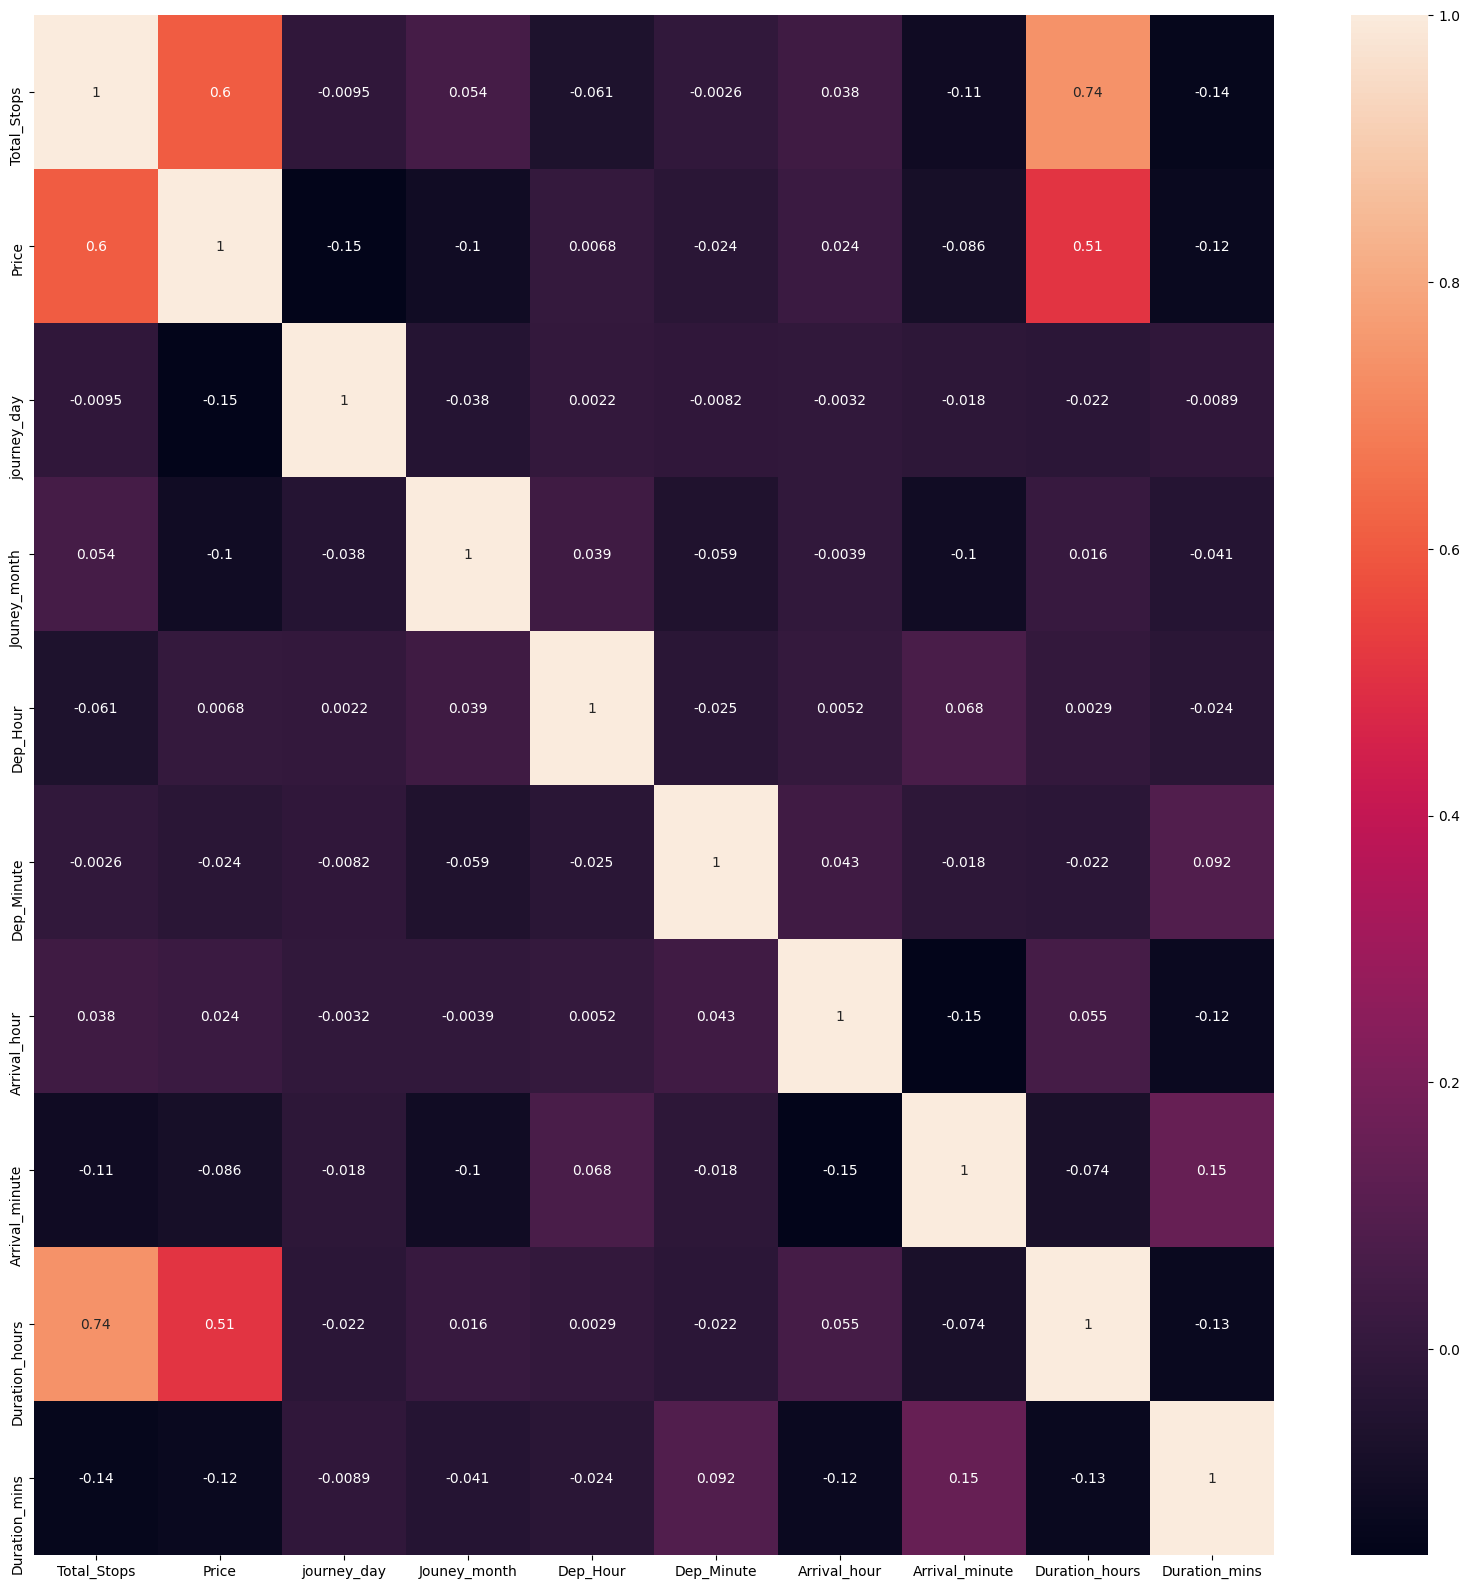

In [100]:
plt.figure(figsize = (20,20))

sns.heatmap(flight_data.corr(), annot = True)

plt.show()

# Now we Check important Featuresfor our Y(Target)

In [101]:
from sklearn.ensemble import ExtraTreesRegressor
imp_f = ExtraTreesRegressor()
imp_f.fit(X,y)

ExtraTreesRegressor()

In [102]:
print(imp_f.feature_importances_)

[2.16259488e-01 1.43228628e-01 5.37724174e-02 2.48835401e-02
 2.10204204e-02 2.75809287e-02 1.85624810e-02 1.24043391e-01
 1.77351215e-02 9.76485125e-03 1.71225736e-03 1.76110203e-02
 1.44704178e-01 6.77446551e-02 1.96128642e-02 8.75911431e-04
 2.88362850e-03 4.91815529e-03 9.46570507e-05 1.03797274e-02
 1.71481398e-02 9.10212927e-03 5.02343583e-04 2.50342336e-02
 5.07701211e-04 1.22033603e-02 3.04754625e-03 5.06622476e-03]


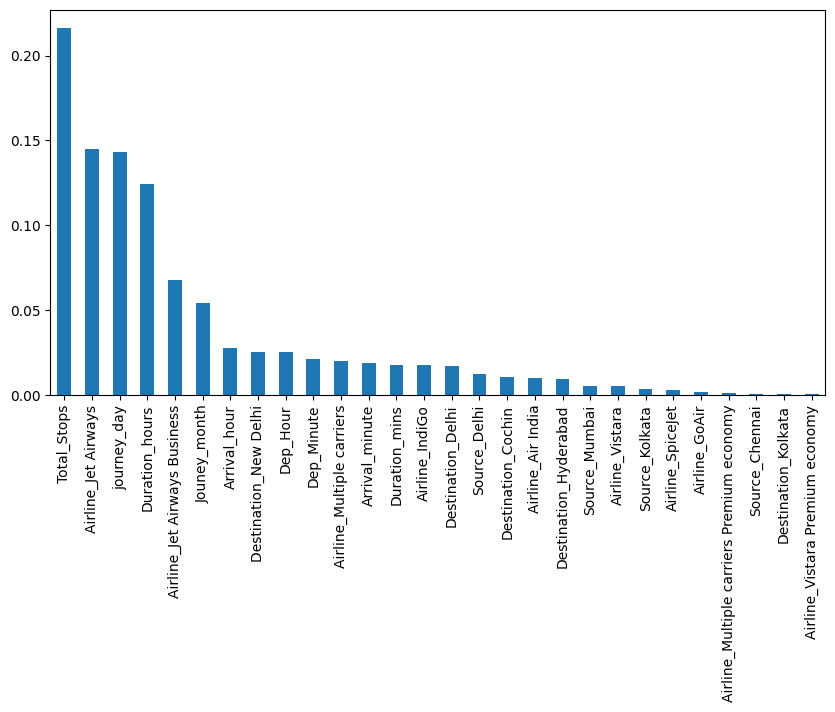

In [103]:
plt.figure(figsize = (10,5))
important_f = pd.Series(imp_f.feature_importances_, index = X.columns)
important_f.nlargest(29).plot(kind = "bar")
plt.show()

In [104]:
len(X.columns.value_counts())

28

# Now We Train the Model using different Regression Techniques

In [105]:
#RandomF0rest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [106]:

from sklearn.ensemble import RandomForestRegressor



In [107]:
reg_rf = RandomForestRegressor() 
#n_estimators=700, min_samples_split=15, min_samples_leaf=1,max_features='auto',max_depth=20

reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [108]:

y_pred = reg_rf.predict(X_test)

In [109]:
y_pred.shape

(2137,)

In [110]:
reg_rf.score(X_train, y_train)  

0.9528576378470266

In [111]:
reg_rf.score(X_test, y_test)  

0.7963296422997681

C:\Users\SUNNY\.conda\envs\FlightFare\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


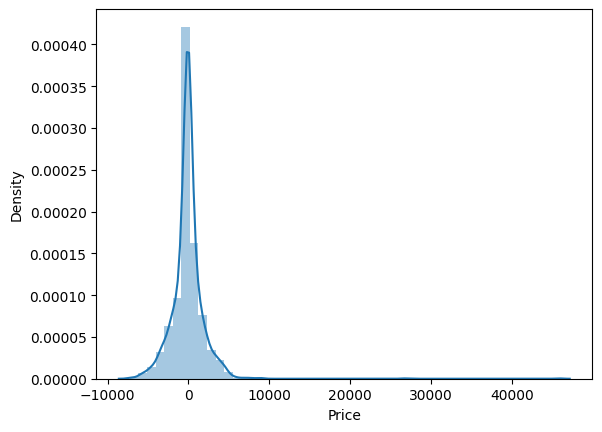

In [112]:
sns.distplot(y_test-y_pred)
plt.show()

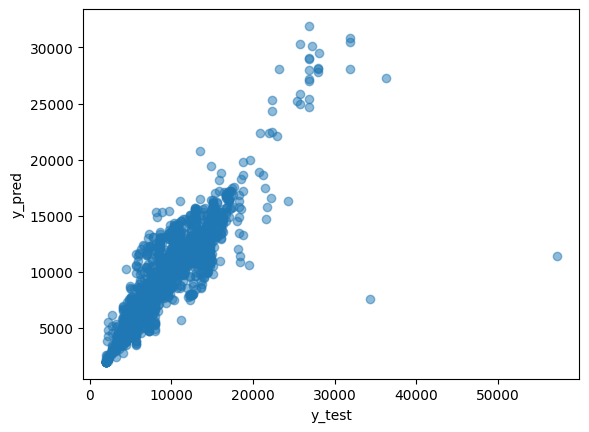

In [113]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Now We Predict On Test DataSet we have Removed airline Trujet as we ave only 1 record of it we need atleast 28 columns to test the data because we trained our model using 28 columns

In [114]:
test_data.shape

(2671, 28)

In [116]:
y_pred_1 = reg_rf.predict(test_data)

In [117]:
output = pd.DataFrame({ 'Price': y_pred_1})

In [118]:
output

,Price
0,12234.020000
1,7857.920000
2,13271.460333
3,8134.313333
4,6932.020000
...,...
2666,8731.090000
2667,9939.920000
2668,15711.095000
2669,7497.065000


# Result for Test-set Data

In [119]:
output_combined = pd.concat([test_data,output], axis = 1)

In [120]:
Original_test = pd.read_csv("Test_set.csv")

In [121]:
output_combined_1 = pd.concat([Original_test,output], axis = 1) 

In [122]:
output_combined

,Total_Stops,doj_day,doj_month,arrival_hour,arrival_minute,Duration_hours,Duration_mins,Dep_time_Hour,Dep_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Price
0,1,6,6,4,25,10,55,17,30,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,12234.020000
1,1,12,5,10,20,4,0,6,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7857.920000
2,1,21,5,19,0,23,45,19,15,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13271.460333
3,1,21,5,21,0,13,0,8,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,8134.313333
4,0,24,6,2,45,2,50,23,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6932.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,25,23,55,20,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8731.090000
2667,0,27,3,16,55,2,35,14,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9939.920000
2668,1,6,3,4,25,6,35,21,50,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,15711.095000
2669,1,6,3,19,15,15,15,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,7497.065000


In [123]:
output_combined_1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,12234.020000
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,7857.920000
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13271.460333
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,8134.313333
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6932.020000
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,8731.090000
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,9939.920000
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,15711.095000
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,7497.065000


In [124]:
output_combined_1.to_csv('test_set_Result.csv', index=False)

# HyperTuning of Paramters to find best parameters for our RandomForest

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [127]:

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [128]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [129]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

# now we again train our model using best paramaters in RandomForest 

In [131]:
reg_rf_1 = RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1,max_features='auto',max_depth=20) 

In [132]:
reg_rf_1

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [133]:
reg_rf_1.fit(X,y)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [134]:
reg_predict = reg_rf_1.predict(X_test)

In [135]:
X_test

,Total_Stops,journey_day,Jouney_month,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
6075,2,21,5,15,5,1,30,10,25,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3544,1,3,6,10,35,19,35,9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9291,1,9,5,20,20,9,5,12,45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5032,0,24,5,14,45,17,5,2,20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2483,1,21,5,22,50,4,25,5,35,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1,27,6,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
9871,0,6,3,17,15,19,45,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
10063,1,21,4,7,55,22,25,14,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8802,1,24,3,6,30,23,25,16,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [136]:
output_1 = pd.DataFrame({"Price" : reg_predict})

In [137]:
output_1

,Price
0,16935.059165
1,5495.340859
2,8767.032236
3,3694.411069
4,14468.436574
...,...
2132,10153.800349
2133,5039.470254
2134,6924.702890
2135,11304.856098


In [145]:
flight_test_1 = pd.read_csv("Test_set.csv")

In [146]:
combined_1 = pd.concat([flight_test_1,output_1], axis = 1)

In [147]:
combined_1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,16935.059165
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5495.340859
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,8767.032236
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,3694.411069
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,14468.436574
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [148]:
output_1.to_csv('modifiedParamterResult.csv', index=False)

In [149]:
reg_rf_1.score(X_train, y_train)


0.8995140497081164

In [150]:
reg_rf_1.score(X_test, y_test)

0.9076056115456719

In [151]:
import pickle

In [152]:
model_out = open("flight_model.pkl", "wb")

pickle.dump(reg_rf_1, model_out)

In [155]:
model_open = open("flight_model.pkl", "rb")
forest = pickle.load(model_open)

In [156]:
y_prediction = forest.predict(X_test)

In [161]:
from sklearn import metrics

In [162]:
metrics.r2_score(y_test, y_prediction)

0.9076056115456719